## Switching Pattern Discovery
Section 6.2 in the paper

In [1]:
import os
wd = os.path.normpath(os.getcwd() + '/..')
os.chdir(wd)
os.getcwd()

'/home/hyunsung/Workspace/soccercpd'

In [43]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from sympy.combinatorics import Permutation
from sympy.interactive import init_printing
import matplotlib.pyplot as plt
from src.myconstants import *

pd.set_option('display.width', 250)
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 20)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 20

In [3]:
init_printing(perm_cyclic=True, pretty_print=False)

In [4]:
# Choose an activity to analyze
activity_id = 17985

In [6]:
mode = 'gseg_avg'
fgp_path = f'data/{mode}/fgp/{activity_id}.csv'
fgp_df = pd.read_csv(fgp_path, header=0, encoding='utf-8-sig')
fgp_df['datetime'] = pd.to_datetime(fgp_df['datetime'])
fgp_df['roleperm'] = fgp_df.apply(lambda x: (x['base_role'], x['role']), axis=1)
fgp_df

,player_id,squad_num,player_name,datetime,session,gametime,player_period,form_period,role_period,x,y,x_norm,y_norm,role,base_role,switch_rate,roleperm
0,4181,2,P02,2020-01-01 19:00:01,1,00:01.0,1,1,1,4667.0,512.0,-58.0,-2862.6,1,1,0.2,"(1, 1)"
1,4181,2,P02,2020-01-01 19:00:02,1,00:02.0,1,1,1,4694.0,388.0,-37.5,-2982.2,1,1,0.2,"(1, 1)"
2,4181,2,P02,2020-01-01 19:00:03,1,00:03.0,1,1,1,4657.0,315.0,-112.2,-3034.6,1,1,0.0,"(1, 1)"
3,4181,2,P02,2020-01-01 19:00:04,1,00:04.0,1,1,1,4681.0,340.0,-155.1,-3033.7,1,1,0.0,"(1, 1)"
4,4181,2,P02,2020-01-01 19:00:05,1,00:05.0,1,1,1,4718.0,440.0,-185.7,-3017.1,1,1,0.0,"(1, 1)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56352,4142,99,P99,2020-01-01 20:48:56,2,47:56.0,4,4,5,2624.0,1881.0,1072.1,-1456.9,10,10,0.5,"(10, 10)"
56353,4142,99,P99,2020-01-01 20:48:57,2,47:57.0,4,4,5,2438.0,1801.0,1010.5,-1469.9,10,10,0.5,"(10, 10)"
56354,4142,99,P99,2020-01-01 20:48:58,2,47:58.0,4,4,5,2269.0,1820.0,884.9,-1349.0,10,10,0.5,"(10, 10)"
56355,4142,99,P99,2020-01-01 20:48:59,2,47:59.0,4,4,5,2171.0,1959.0,781.4,-1169.7,10,10,0.5,"(10, 10)"


In [7]:
roleperms = fgp_df.pivot_table(
    values='roleperm', index='datetime', columns='player_name', aggfunc='first'
)
roleperms['switch_rate'] = fgp_df.groupby('datetime')['switch_rate'].first()
roleperms

player_name,P02,P06,P09,P10,P20,P23,P24,P30,P32,P42,P47,P70,P99,switch_rate
datetime,,,,,,,,,,,,,,
2020-01-01 19:00:01,"(1, 1)","(2, 2)","(3, 5)",NaN,"(4, 4)","(5, 3)","(6, 6)","(7, 7)",NaN,NaN,"(8, 8)","(9, 9)","(10, 10)",0.2
2020-01-01 19:00:02,"(1, 1)","(2, 2)","(3, 5)",NaN,"(4, 4)","(5, 3)","(6, 6)","(7, 7)",NaN,NaN,"(8, 8)","(9, 9)","(10, 10)",0.2
2020-01-01 19:00:03,"(1, 1)","(2, 2)","(3, 3)",NaN,"(4, 4)","(5, 5)","(6, 6)","(7, 7)",NaN,NaN,"(8, 8)","(9, 9)","(10, 10)",0.0
2020-01-01 19:00:04,"(1, 1)","(2, 2)","(3, 3)",NaN,"(4, 4)","(5, 5)","(6, 6)","(7, 7)",NaN,NaN,"(8, 8)","(9, 9)","(10, 10)",0.0
2020-01-01 19:00:05,"(1, 1)","(2, 2)","(3, 3)",NaN,"(4, 4)","(5, 5)","(6, 6)","(7, 7)",NaN,NaN,"(8, 8)","(9, 9)","(10, 10)",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-01 20:48:56,"(1, 1)","(2, 4)",NaN,"(9, 3)",NaN,NaN,"(3, 6)","(7, 7)","(6, 9)","(4, 2)","(8, 8)","(5, 5)","(10, 10)",0.5
2020-01-01 20:48:57,"(1, 1)","(2, 4)",NaN,"(9, 3)",NaN,NaN,"(3, 6)","(7, 7)","(6, 9)","(4, 2)","(8, 8)","(5, 5)","(10, 10)",0.5
2020-01-01 20:48:58,"(1, 1)","(2, 4)",NaN,"(9, 3)",NaN,NaN,"(3, 6)","(7, 7)","(6, 9)","(4, 2)","(8, 8)","(5, 5)","(10, 10)",0.5


In [11]:
def decompose_to_cycles(roleperm):
    if roleperm['switch_rate'] > 0.6:
        return []
    
    perm_list = [0] + [r for (l, r) in sorted([t for t in roleperm[:-1] if str(t) != 'nan'])]
    if len(perm_list) < 11:
        return []
    
    p = Permutation(perm_list)
    perm_str = str(p)
    
    result_list = []
    cycles_str = perm_str.split(')')
    for c in cycles_str:
        c = c.replace('(', '')
        result_list.append(c.split(' '))
        
    return [s for s in result_list if len(s) > 1]

In [12]:
cycles = roleperms.apply(decompose_to_cycles, axis=1)
cycle_list = [(dt, ' '.join(c)) for dt, cycles_t in cycles.iteritems() for c in cycles_t]
cycles_flatten = pd.Series([c for (dt, c) in cycle_list], index=[dt for (dt, c) in cycle_list])
cycles_flatten

2020-01-01 19:00:01         3 5
2020-01-01 19:00:02         3 5
2020-01-01 19:00:12    1 10 4 2
2020-01-01 19:00:13    1 10 4 2
2020-01-01 19:00:14    1 10 4 2
                         ...   
2020-01-01 20:48:58       3 6 9
2020-01-01 20:48:59         2 4
2020-01-01 20:48:59       3 6 9
2020-01-01 20:49:00         2 3
2020-01-01 20:49:00         6 9
Length: 3550, dtype: object

In [13]:
role_records = pd.read_csv(f'data/role_records.csv', header=0, encoding='utf-8-sig')
role_record = role_records[role_records['activity_id'] == activity_id].copy()
role_record['start_dt'] = pd.to_datetime(role_record['start_dt'])
role_record['end_dt'] = pd.to_datetime(role_record['end_dt'])
role_record

,activity_id,player_period,form_period,role_period,session,start_dt,end_dt,duration,player_id,squad_num,player_name,base_role,x,y,formation,aligned_role
17046,17985,1,1,1,1,2020-01-01 19:00:00,2020-01-01 19:18:10,1090,4181,2,P02,1,-736.0,-1691.0,4231,RB
17047,17985,1,1,1,1,2020-01-01 19:00:00,2020-01-01 19:18:10,1090,5516,6,P06,2,-1277.0,-673.0,4231,RCB
17048,17985,1,1,1,1,2020-01-01 19:00:00,2020-01-01 19:18:10,1090,4650,9,P09,3,1623.0,-56.0,4231,CF
17049,17985,1,1,1,1,2020-01-01 19:00:00,2020-01-01 19:18:10,1090,1853,20,P20,4,-99.0,-585.0,4231,RDM
17050,17985,1,1,1,1,2020-01-01 19:00:00,2020-01-01 19:18:10,1090,3574,23,P23,5,971.0,17.0,4231,CAM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17091,17985,4,4,5,2,2020-01-01 20:41:00,2020-01-01 20:49:00,480,5525,32,P32,6,169.0,603.0,442,LCM
17092,17985,4,4,5,2,2020-01-01 20:41:28,2020-01-01 20:49:00,452,5527,42,P42,4,-257.0,-510.0,442,RCM
17093,17985,4,4,5,2,2020-01-01 20:41:00,2020-01-01 20:49:00,480,1365,47,P47,8,-796.0,1626.0,442,LB
17094,17985,4,4,5,2,2020-01-01 20:41:00,2020-01-01 20:49:00,480,5488,70,P70,5,1207.0,-572.0,442,RCF


In [37]:
form_periods = pd.read_pickle(f'data/form_periods.pkl')
form_periods = form_periods[form_periods[LABEL_ACTIVITY_ID] == activity_id].set_index(LABEL_FORM_PERIOD)
form_periods['session_ord'] = form_periods[LABEL_SESSION].apply(lambda x: f"{x}{'st' if x==1 else 'nd'}")

session_starts = form_periods.groupby(LABEL_SESSION).apply(lambda x: x[LABEL_START_DT].min())
form_periods[LABEL_START_TIME] = (
    form_periods[LABEL_START_DT] - session_starts[form_periods[LABEL_SESSION]].values
).apply(lambda x: x.total_seconds() // 60).astype(int)
form_periods[LABEL_END_TIME] = (
    form_periods[LABEL_END_DT] - session_starts[form_periods[LABEL_SESSION]].values
).apply(lambda x: x.total_seconds() // 60).astype(int)

form_periods['title'] = form_periods.apply(
    lambda x: f"{x['session_ord']} Half {x[LABEL_START_TIME]}'~{x[LABEL_END_TIME]}':"
              f"{'-'.join(x[LABEL_FORMATION])}",
    axis=1
)
form_periods


,activity_id,session,start_dt,end_dt,duration,coords,edge_mat,cluster,formation,session_ord,start_time,end_time,title
form_period,,,,,,,,,,,,,
1,17985,1,2020-01-01 19:00:00,2020-01-01 19:17:40,1060.0,"[[-719.0, -1748.0], [-1292.0, -701.0], [1640.0...","[[0.0, 0.998, 0.065, 0.88, 0.152, 0.049, 0.367...",26,4231,1st,0,17,1st Half 0'~17':4-2-3-1
2,17985,1,2020-01-01 19:17:40,2020-01-01 19:46:00,1700.0,"[[-741.0, -1586.0], [-1399.0, -552.0], [1709.0...","[[0.0, 0.989, 0.049, 0.768, 0.521, 0.128, 0.27...",16,433,1st,17,46,1st Half 17'~46':4-3-3
3,17985,2,2020-01-01 20:01:00,2020-01-01 20:14:00,780.0,"[[-631.0, -1836.0], [-1478.0, -814.0], [1672.0...","[[0.0, 0.995, 0.047, 0.668, 0.588, 0.032, 0.21...",16,433,2nd,0,13,2nd Half 0'~13':4-3-3
4,17985,2,2020-01-01 20:14:00,2020-01-01 20:49:00,2100.0,"[[-714.0, -1650.0], [-1348.0, -558.0], [1548.0...","[[0.0, 0.94, 0.052, 0.88, 0.309, 0.057, 0.219,...",20,442,2nd,13,48,2nd Half 13'~48':4-4-2


In [38]:
role_position_table = role_record.pivot_table(
    values='aligned_role', index='role_period', columns='base_role', aggfunc='first'
)
role_position_table

base_role,1,2,3,4,5,6,7,8,9,10
role_period,,,,,,,,,,
1,RB,RCB,CF,RDM,CAM,LDM,LCB,LB,LM,RM
2,RB,RCB,CF,CDM,RCM,LCM,LCB,LB,LM,RM
3,RB,RCB,CF,CDM,RCM,LCM,LCB,LB,LM,RM
4,RB,RCB,LCF,RCM,RCF,LCM,LCB,LB,LM,RM
5,RB,RCB,LCF,RCM,RCF,LCM,LCB,LB,LM,RM


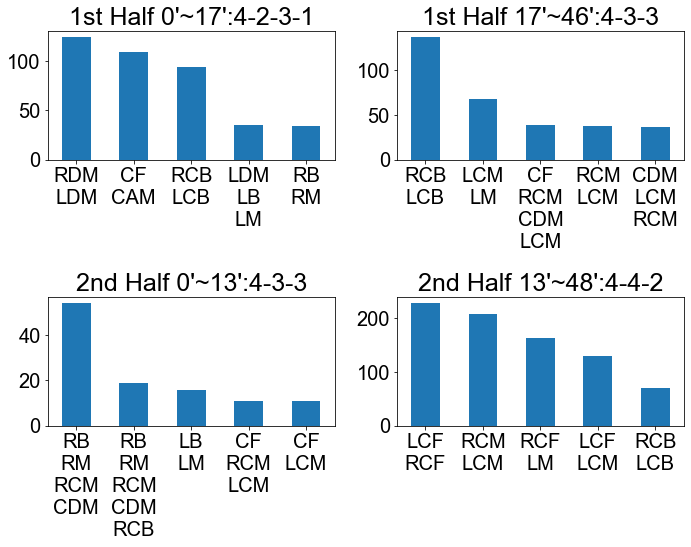

In [46]:
fig = plt.figure(figsize=(10, 8))
for i in form_periods.index[:4]:
    role_time = form_periods.loc[i]
    role_position = role_position_table.loc[i]
    position_cycles = cycles_flatten[
        (cycles_flatten.index >= role_time['start_dt']) &
        (cycles_flatten.index < role_time['end_dt'])
    ].to_frame(name='role')
    position_cycles['position'] = position_cycles['role'].apply(
        lambda x: '\n'.join([role_position[int(s)] for s in x.split(' ')])
    )
    plt.subplot(2, 2, i)
    # plt.figure(i)
    vc = position_cycles['position'].value_counts()[:5]
    vc.plot.bar()
    plt.gca().title.set_text(role_time['title'])
    plt.gca().title.set_size(25)
    plt.xticks(rotation=0)
    plt.tight_layout()